In [2]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Train_data.csv to Train_data.csv


In [64]:
#Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [65]:
df_train = pd.read_csv('Train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_test = df_test.drop('Unnamed: 0',axis=1)

# Exploring the data


2 Data tersebut mempunyai 42 columns

Training set mempunyai 125973 and Test set mempunyai 10000 sample

In [66]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


# Simpan training data set dan test dataset ke setiap dataframe dan pisahkan X dan Y

Menggunakan 41 atribut dari training dataset dan testing dataset untuk memngklasifikasikan apakah itu Attack
DOS/
R2L/
Probe/
U2R/
Normal

In [67]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

In [68]:
print(Y_train.apply(lambda col: col.unique()))

  xAttack
0  normal
1     dos
2     r2l
3   probe
4     u2r


# Preprocessing dan one hot encoding, X adalah onehotencoder, Y adalah LabelBinarizer

preprocessing adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data

One hot encoding adalah sebuah proses yang biasanya berada pada bagian pre-processing yang bertujuan untuk mengubah data kategorikal integer menjadi boolean

In [69]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [70]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

# X OneHotEncoding

In [71]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Y LabelBinarizer

In [72]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


# 1. Standard deviation

Lalu menerapkan metode untuk mengecualikan fitur dengan standarr deviasi. Lalu ketika fitur itu discrete, maka deviasinay kecil

In [73]:
#mengecualikan feature continue
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n terkecil std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


num_outbound_cmds dihapus dari yang pertama karena standar deviasinya nol.

In [74]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Standad Deviasi mengambil 10 terendah dan menyimpan feature di X_train_stdrop. (Akan digunakan setelah pemilihan fitur ansambel)

In [75]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


Melakukan Linear Regretion

Regresi linear adalah regresi linear yang digunakan untuk mengestimasi atau memprediksi hubungan antara dua variabel dalam penelitian kuantitatif.

In [76]:
from sklearn import linear_model

In [77]:
LR = linear_model.LinearRegression()

In [78]:
LR.fit(X_train, Y_train)

LinearRegression()

In [79]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.33 %


Linear Regretion hanya menghasilkan probabilitas 33%

# 2. Ensemble feature selection

Ensemble Modeling dapat melihat bagaimana fitur tersebut memengaruhi setiap model



In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [81]:
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [82]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

Periksa kepentingan fitur untuk melihat seberapa akurat fitur dasarnya.

In [83]:
AB.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [84]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.752 %


In [85]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [86]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.741 %


In [87]:
ET.fit(X_train, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [88]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.756 %


In [89]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [90]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.767 %


Mari liat bagaimana fitur saling mempengaruhi melalui Ensemble

In [91]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,duration,0.000063,0.003650,0.002554,0.001016
1,protocol_type,0.460444,0.015162,0.022134,0.011378
2,service,0.520245,0.021517,0.018186,0.007759
3,flag,0.000041,0.013829,0.012265,0.001152
4,src_bytes,0.006674,0.126208,0.022288,0.361525
5,dst_bytes,0.001454,0.066285,0.009973,0.062884
6,land,0.000005,0.000014,0.000070,0.000036
7,wrong_fragment,0.000106,0.010518,0.017985,0.013346


Grafik yang menunjukkan pengaruh fitur

[Text(0, 0, 'duration'),
 Text(1, 0, 'protocol_type'),
 Text(2, 0, 'service'),
 Text(3, 0, 'flag'),
 Text(4, 0, 'src_bytes'),
 Text(5, 0, 'dst_bytes'),
 Text(6, 0, 'land'),
 Text(7, 0, 'wrong_fragment'),
 Text(8, 0, 'urgent'),
 Text(9, 0, 'hot'),
 Text(10, 0, 'num_failed_logins'),
 Text(11, 0, 'logged_in'),
 Text(12, 0, 'num_compromised'),
 Text(13, 0, 'root_shell'),
 Text(14, 0, 'su_attempted'),
 Text(15, 0, 'num_root'),
 Text(16, 0, 'num_file_creations'),
 Text(17, 0, 'num_shells'),
 Text(18, 0, 'num_access_files'),
 Text(19, 0, 'is_host_login'),
 Text(20, 0, 'is_guest_login'),
 Text(21, 0, 'count'),
 Text(22, 0, 'srv_count'),
 Text(23, 0, 'serror_rate'),
 Text(24, 0, 'srv_serror_rate'),
 Text(25, 0, 'rerror_rate'),
 Text(26, 0, 'srv_rerror_rate'),
 Text(27, 0, 'same_srv_rate'),
 Text(28, 0, 'diff_srv_rate'),
 Text(29, 0, 'srv_diff_host_rate'),
 Text(30, 0, 'dst_host_count'),
 Text(31, 0, 'dst_host_srv_count'),
 Text(32, 0, 'dst_host_same_srv_rate'),
 Text(33, 0, 'dst_host_diff_srv_r

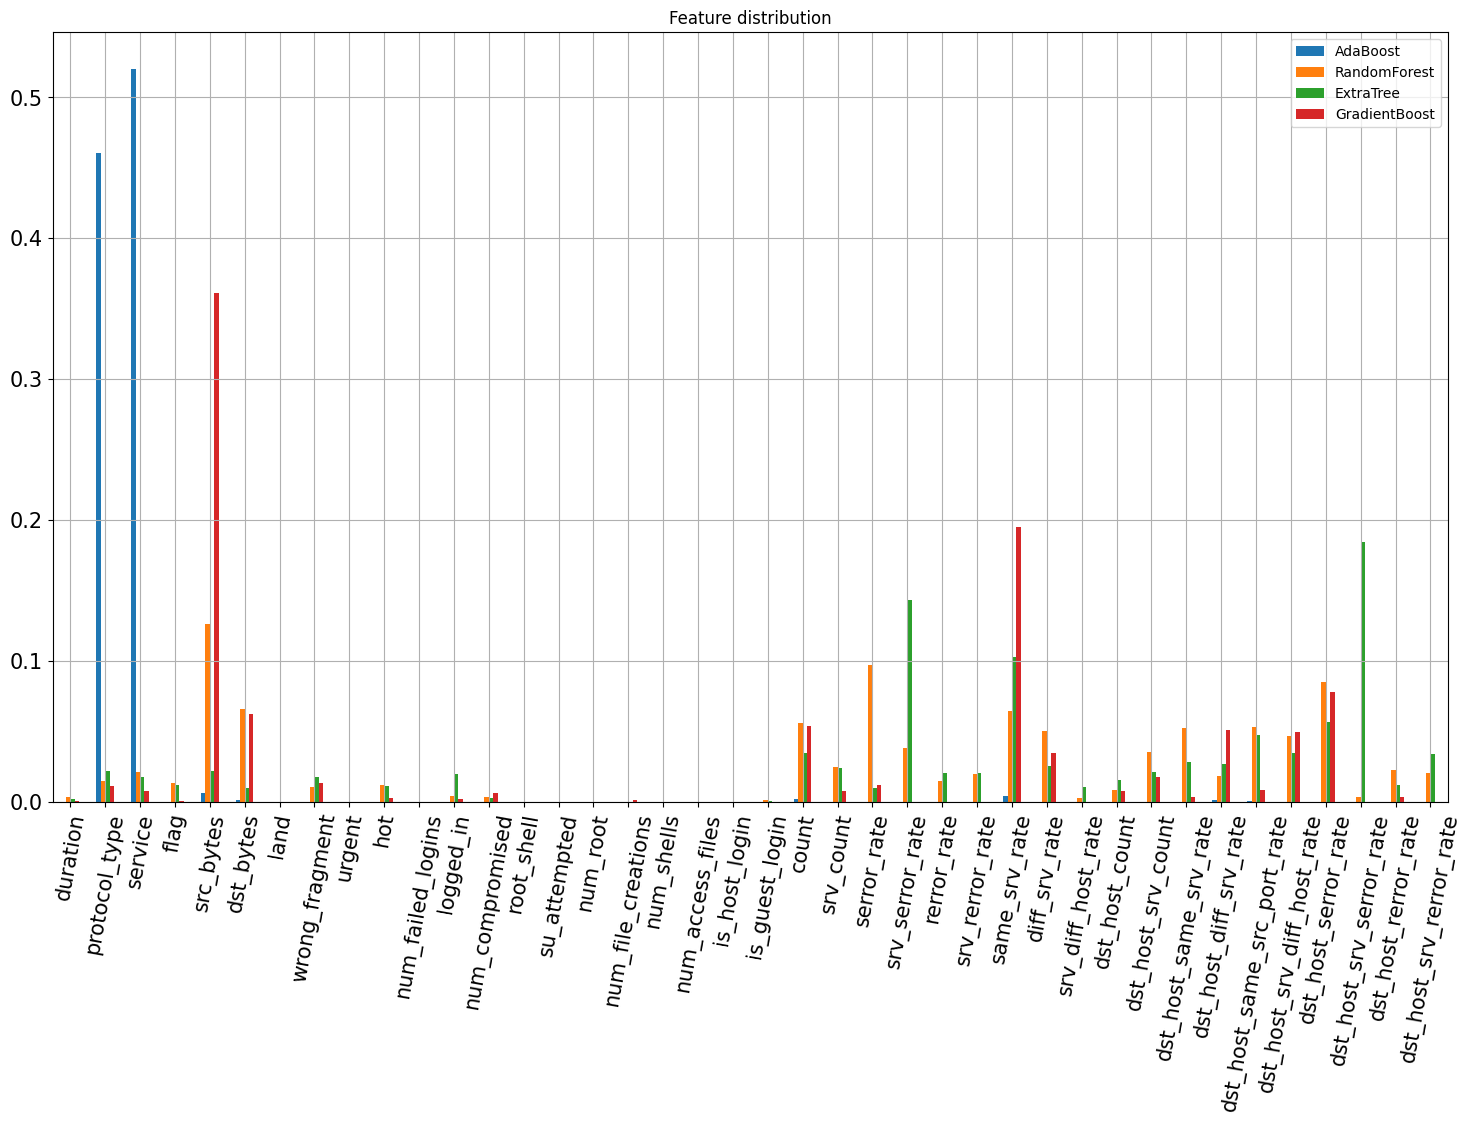

In [92]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15,
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)


Ekstrak 12 fitur dari setiap model Ensemble

In [93]:
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

Delete Duplicates

In [95]:
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() # delete duplicate feature
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
2,service,0.520245,0.021517,0.018186,0.007759
1,protocol_type,0.460444,0.015162,0.022134,0.011378
4,src_bytes,0.006674,0.126208,0.022288,0.361525
27,same_srv_rate,0.004401,0.064923,0.103195,0.194908
21,count,0.002365,0.056165,0.035180,0.054409
33,dst_host_diff_srv_rate,0.001811,0.018831,0.026835,0.051017
5,dst_bytes,0.001454,0.066285,0.009973,0.062884
34,dst_host_same_src_port_rate,0.000796,0.053537,0.047404,0.008545
36,dst_host_serror_rate,0.000344,0.085518,0.056706,0.078092
31,dst_host_srv_count,0.000320,0.035407,0.021269,0.017990


In [45]:
selected_features = result['features'].values.tolist()
selected_features

['service',
 'protocol_type',
 'src_bytes',
 'same_srv_rate',
 'count',
 'dst_host_diff_srv_rate',
 'dst_bytes',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'num_compromised',
 'dst_host_srv_serror_rate',
 'srv_serror_rate',
 'logged_in',
 'dst_host_rerror_rate',
 'dst_host_srv_diff_host_rate',
 'diff_srv_rate',
 'wrong_fragment',
 'serror_rate']


Berikut adalah hasil training dengan pengecualian fitur dengan standar deviasi kecil.

In [47]:
AB.fit(X_train_stdrop, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [48]:
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

AdaBoostClassifier_stdrop processing ,,,
AdaBoostClasifier Score: 0.736 %


In [49]:
RF.fit(X_train_stdrop, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [51]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.756 %


In [52]:
ET.fit(X_train_stdrop, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [53]:
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.750 %


In [54]:
GB.fit(X_train_stdrop, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [55]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.75 %



Hanya fitur yang diperoleh melalui ansambel

In [56]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,service,protocol_type,src_bytes,same_srv_rate,count,dst_host_diff_srv_rate,dst_bytes,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_same_srv_rate,num_compromised,dst_host_srv_serror_rate,srv_serror_rate,logged_in,dst_host_rerror_rate,dst_host_srv_diff_host_rate,diff_srv_rate,wrong_fragment,serror_rate
0,25,0,0,1.0,110,0.00,0,0.00,0.65,255,1.00,0,0.65,1.0,0,0.32,0.00,0.0,0,1.0
1,25,0,312,1.0,1,0.00,1856,1.00,0.00,254,1.00,0,0.00,0.0,1,0.00,0.06,0.0,0,0.0
2,25,0,245,1.0,5,0.00,2058,0.01,0.01,255,1.00,0,0.00,0.0,1,0.00,0.05,0.0,0,0.0
3,25,0,298,1.0,4,0.00,1267,0.00,0.00,255,1.00,0,0.00,0.0,1,0.00,0.00,0.0,0,0.0
4,20,0,740,1.0,1,0.03,0,0.18,0.00,19,0.18,0,0.00,0.0,0,0.00,0.00,0.0,0,0.0


# 3. Correlation


Fitur yang memiliki korelasi tinggi di antara beberapa fitur (fitur redundan) akan digabungkan atau dihapus. Hal ini karena jika terdapat korelasi yang besar antara fitur-fitur tersebut, tidak perlu menambah jumlah fitur.

<Axes: >

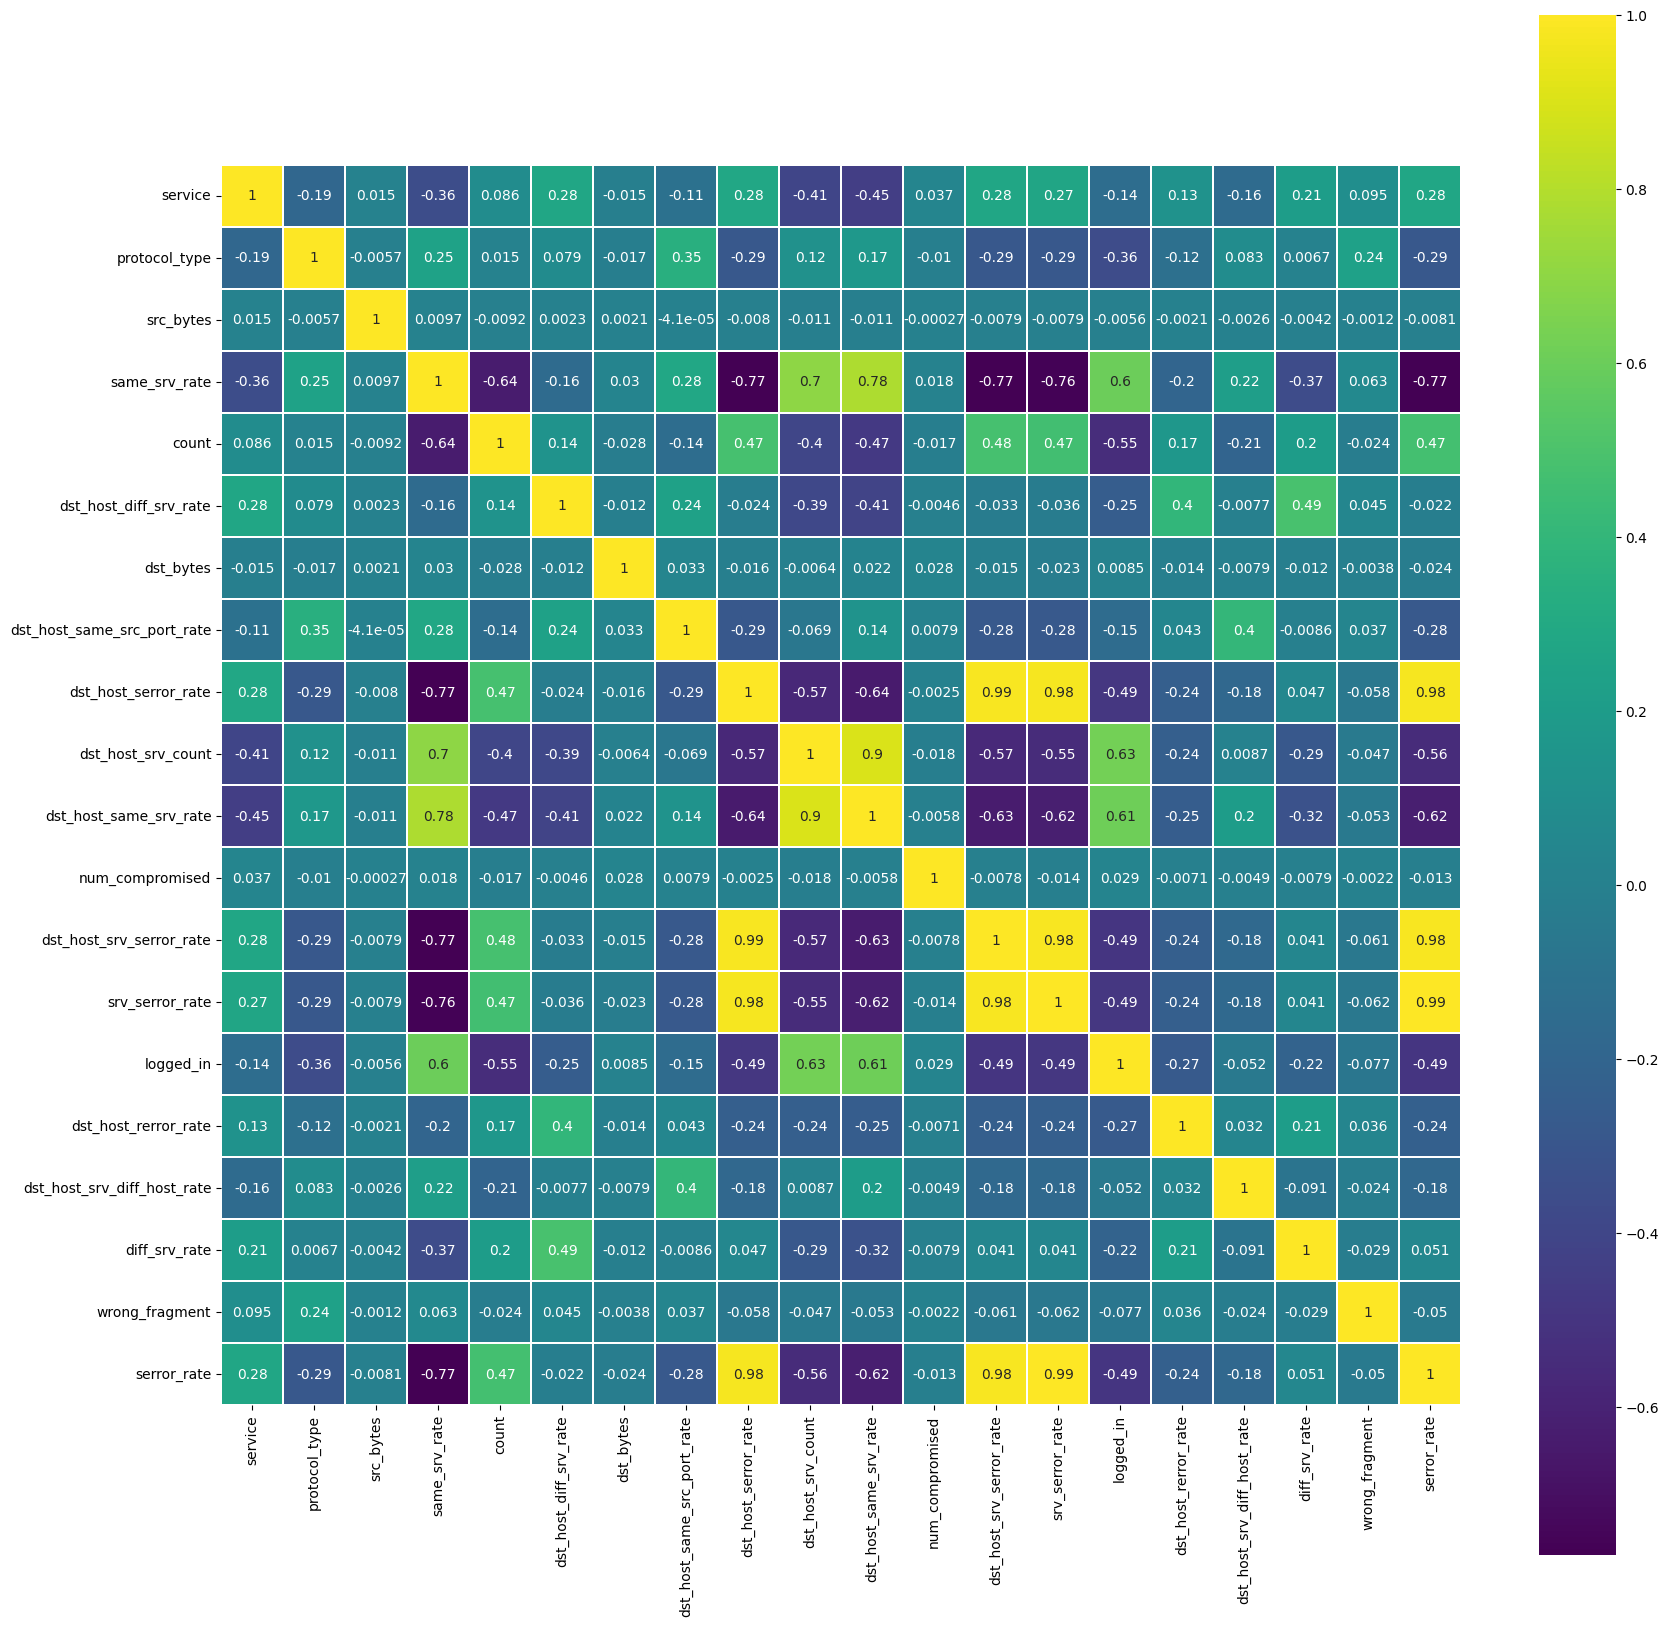

In [59]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

Analisis grafik di atas menunjukkan bahwa ketergantungan tinggi pada fitur-fitur berikut

In [96]:
selected2 = ['dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

,service,protocol_type,src_bytes,same_srv_rate,count,dst_host_diff_srv_rate,dst_bytes,dst_host_same_src_port_rate,dst_host_srv_count,dst_host_same_srv_rate,num_compromised,dst_host_srv_serror_rate,srv_serror_rate,logged_in,dst_host_rerror_rate,dst_host_srv_diff_host_rate,diff_srv_rate,wrong_fragment
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,35.451700,0.278600,6.845032e+03,0.739925,80.152400,0.089412,1.996999e+03,0.133167,139.645700,0.605769,0.020500,0.097781,0.101696,0.436600,0.236296,0.020102,0.089752,0.009000
std,15.824769,0.657134,8.675409e+04,0.413711,129.028094,0.218190,2.006975e+04,0.307154,111.548555,0.436278,0.289289,0.279651,0.295464,0.495989,0.389137,0.089353,0.252240,0.146701
min,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000e+00,0.200000,1.000000,0.000000,0.000000e+00,0.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,5.400000e+01,1.000000,8.000000,0.020000,4.400000e+01,0.000000,159.500000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,0.000000,2.850000e+02,1.000000,126.000000,0.060000,5.990000e+02,0.030000,255.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.390000,0.010000,0.060000,0.000000
max,70.000000,2.000000,6.291668e+06,1.000000,511.000000,1.000000,1.285078e+06,1.000000,255.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


# 2) Modeling

Modeling setelah selesainya proses pemilihan fitur (eliminasi deviasi rendah, korelasi tinggi)


Membandingkan hasil akhir pemodelan dengan fitur yang mempengaruhi pemodelan ansambel


Hasil Pemodelan Ensemble dengan dampak pemodelan akhir

In [97]:
AB.fit(X_train_cordrop, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [98]:
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)

AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.754 %


In [99]:
RF.fit(X_train_cordrop, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [100]:
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.767 %


In [101]:
ET.fit(X_train_cordrop, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [102]:
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.756 %


In [103]:
GB.fit(X_train_cordrop, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [104]:
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)

GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.765 %


In [105]:
LR.fit(X_train_cordrop, Y_train)

LinearRegression()

In [106]:
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.278 %


In [107]:
from sklearn.neural_network import MLPClassifier

In [108]:
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

In [109]:
MLP.fit(X_train_cordrop, Y_train)

MLPClassifier(hidden_layer_sizes=(1000, 300, 300), shuffle=False)

In [110]:
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.703 %


# 3) Result

Hasil dari seleksi dan ekstrasi fitur tidak menghasilkan probabilitas ang tinggi. Melihat peningkatan akurasi 1-2%, tetapi fitur ini akan berkurang dan akan dapat beroperasi sedikit lebih cepat dan akan mencegah oeverfitting saat data baru masuk


Membandingkan skor masing-masing model

Model Pertama

In [111]:
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334265
1,Adaboost,0.752500
2,RandomForest,0.741300
3,ExtraTrees,0.756400
4,GradientBoost,0.766900


[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Adaboost'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'ExtraTrees'),
 Text(4, 0, 'GradientBoost')]

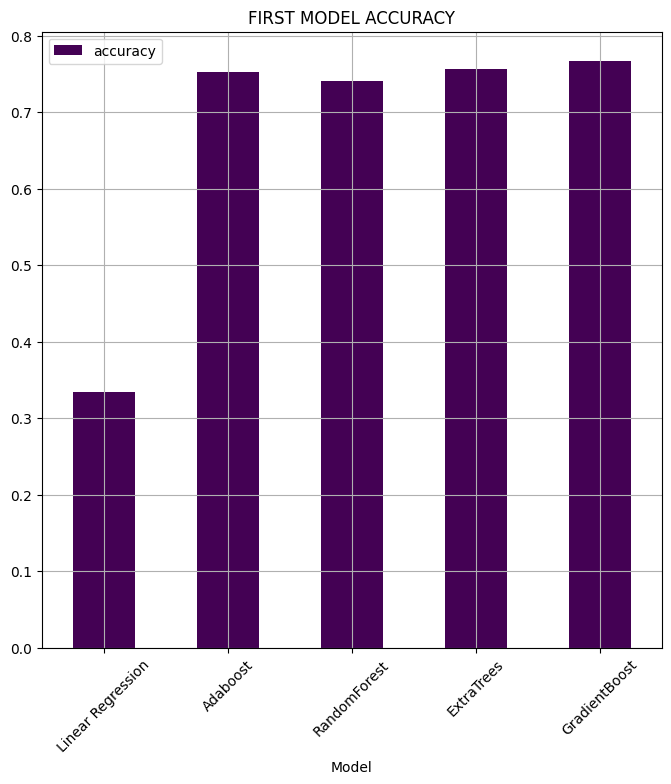

In [112]:
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)

Model Kedua

In [113]:
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7364
1,RandomForest,0.7564
2,ExtraTrees,0.7501
3,GradientBoost,0.7518


[Text(0, 0, 'Adaboost'),
 Text(1, 0, 'RandomForest'),
 Text(2, 0, 'ExtraTrees'),
 Text(3, 0, 'GradientBoost')]

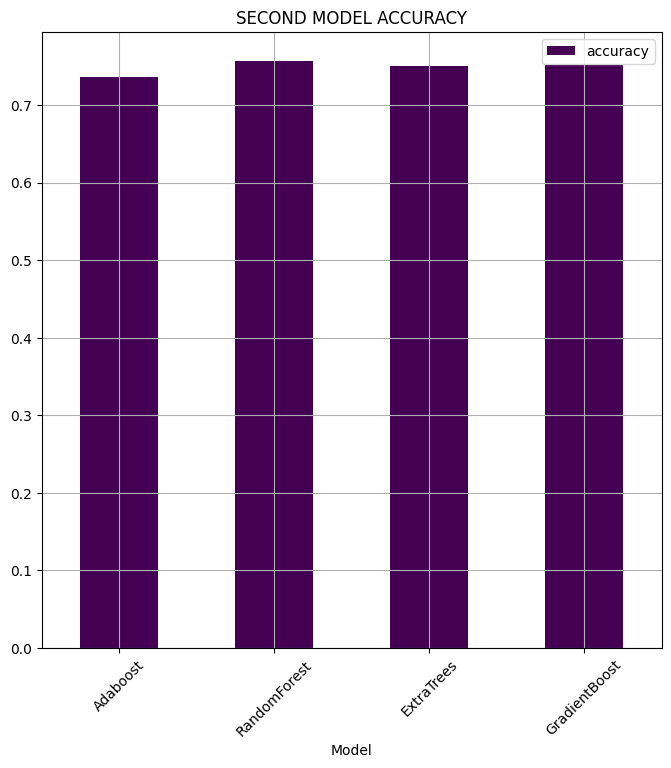

In [114]:
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r2.set_xticklabels(result_df.Model, rotation = 45)

Model Terakhir

In [115]:
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.277581
1,Adaboost,0.754200
2,RandomForest,0.766600
3,ExtraTrees,0.755900
4,GradientBoost,0.765000
5,MLP,0.702600


[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Adaboost'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'ExtraTrees'),
 Text(4, 0, 'GradientBoost'),
 Text(5, 0, 'MLP')]

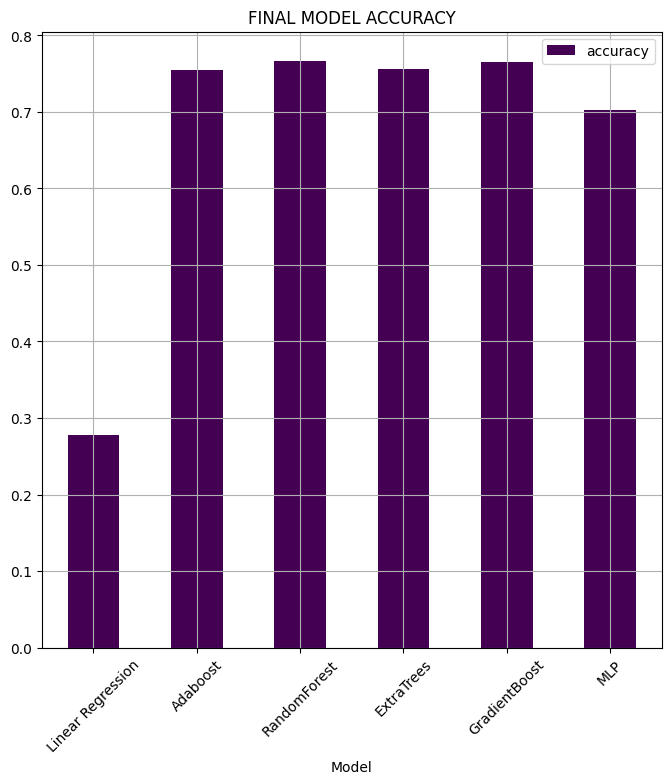

In [116]:
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r3.set_xticklabels(result_df.Model, rotation = 45)

# MODEL TERCEPAT DAN AKURAT - ExtraTrees dari model akhir (76,4%)

# MODEL TERKUAT DAN PALING AKURAT - GradientBoost model akhir (77,1%)

Gradientboost memiliki peluang 77 persen, tetapi kecepatannya jauh lebih cepat dengan ExtraTress.